### 가중치 시각화

In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [2]:
model.layers

In [3]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [4]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.019442454 0.22523199


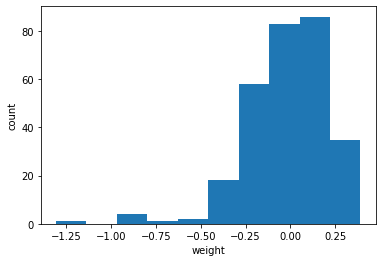

In [5]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

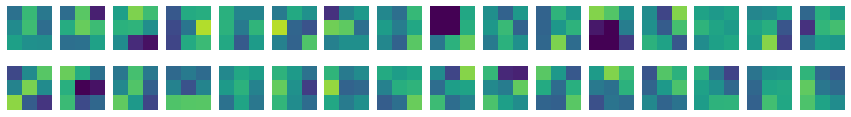

In [6]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [7]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                         padding='same', input_shape=(28,28,1)))

In [8]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [9]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.012390996 0.07875564


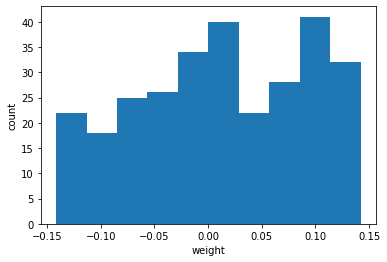

In [11]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

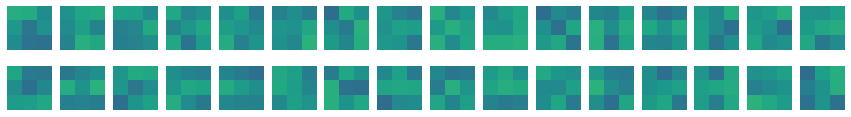

In [12]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [13]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [14]:
conv_acti = keras.Model(model.input, model.layers[0].output)

### 특성 맵 시각화

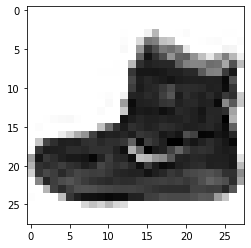

In [15]:
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [16]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 94ms/step


In [17]:
print(feature_maps.shape)

(1, 28, 28, 32)


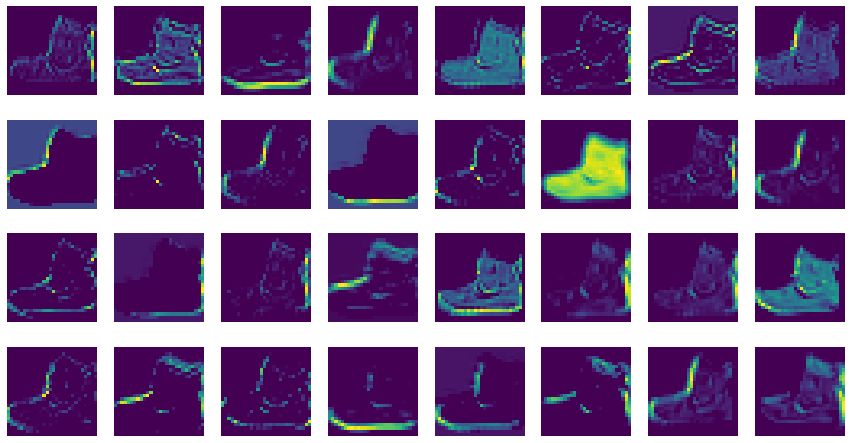

In [18]:
fig, axs = plt.subplots(4,8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [21]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [22]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 46ms/step


In [23]:
print(feature_maps.shape)

(1, 14, 14, 64)


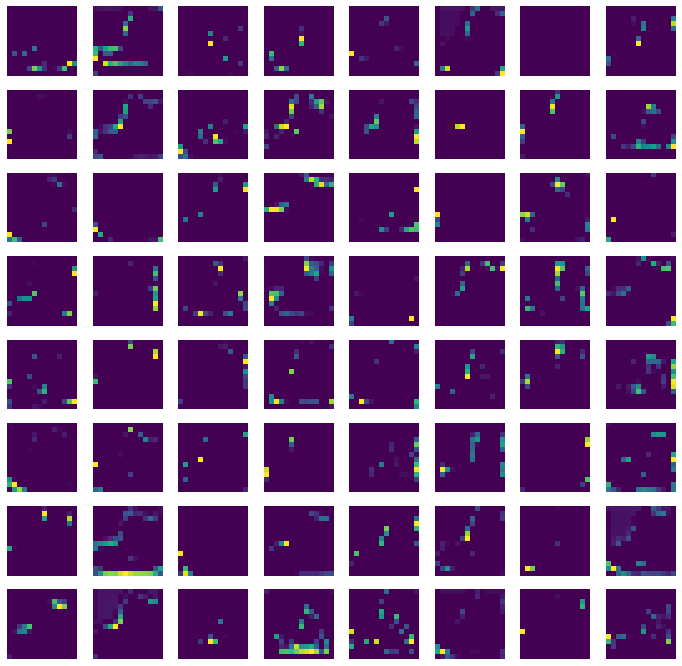

In [24]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

- 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습.